## Checking the Fixed Point Equations of the new TDVP method

In [8]:
import numpy as np
from scipy.stats import unitary_group
np.set_printoptions(linewidth=120)

I = np.array([
    [1,0],
    [0,1]
])
I4 = np.kron(I,I)

Key Function:

`np.kron`

`unitary_group.rvs()`

### Random Unitary Matrix Investigation

[[ 1.01+0.03j -0.01-0.03j  0.01-0.03j  0.02-0.01j]
 [-0.01+0.05j  1.1 -0.01j -0.09+0.04j -0.01+0.02j]
 [ 0.02-0.j    0.02-0.02j  1.1 +0.j   -0.01-0.05j]
 [-0.09+0.01j -0.03+0.03j  0.04+0.02j  1.01+0.06j]]


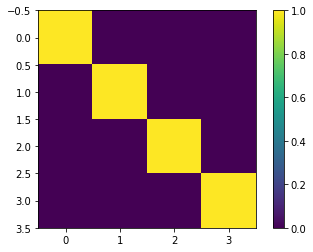

In [2]:

def A(U1, U2, U3):
    
    M =  np.kron (U1, np.kron(I, I)) @ np.kron(I , np.kron(U2, I)) @ np.kron(I, np.kron(I,U3))
    return M


def A_(U1, U2, U3):
    M = np.kron(I, np.kron(I,U3)) @ np.kron(I , np.kron(U2, I)) @ np.kron (U1, np.kron(I, I))
    return M

M_av = np.empty([4,4],dtype = np.complex128)
for i in range(10000):
    U1 = unitary_group.rvs(4)
    U2 = unitary_group.rvs(4)
    U3 = unitary_group.rvs(4)

    dt = 0.1

    dU1 = unitary_group.rvs(4) * dt
    dU2 = unitary_group.rvs(4) * dt 
    dU3 = unitary_group.rvs(4) * dt

    U1_ = U1 + dU1
    U2_ = U2 + dU2
    U3_ = U3 + dU3

    M_Full = A(U1, U2, U3) @ A_(U1_.conj().T, U2_.conj().T, U3_.conj().T)
    M_Red = M_Full.reshape([4,4,4,4])[:,0,:,0]
    
    M_av += M_Red
    
M_av = M_av / 10000

print(np.round(M_Red,2))

import matplotlib.pyplot as plt

plt.imshow(M_av.real)
plt.colorbar()

#### Ensure Anti Hermitian-ness

1. Construct a random matrix $M$
2. Construct an anti-Hermitian matrix $B = \frac{1}{2}(M - M^{H})$
3. B Satisfies the equation $ B = U dU^{\dagger} $ for some matrix $dU$ 
4. Solve for $dU$: $dU^{\dagger} = U^{\dagger}B$
5. Construct $U^{\prime} = U + B^{\dagger}U\\$
     $ = (I + B^{\dagger}) U $
     $ = (I - B) U$


In [9]:
dt = 0.1

M_av_ah  = np.empty([4,4], dtype = np.complex128) # _ah = antihermitian
for _ in range(100):
    M1 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B1 = 0.5 * (M1 - M1.conj().T)*0.1
    M2 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B2 = 0.5 * (M2 - M2.conj().T)*0.1
    M3 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B3 = 0.5 * (M3 - M3.conj().T)*0.1

    U1 = unitary_group.rvs(4)
    U2 = unitary_group.rvs(4)
    U3 = unitary_group.rvs(4)

    U1_ = (I4 - B1)@U1
    U2_ = (I4 - B2)@U2
    U3_ = (I4 - B3)@U3

    M_Full = A(U1, U2, U3) @ A_(U1_.conj().T, U2_.conj().T, U3_.conj().T)
    M_Red = M_Full.reshape([4,4,4,4])[:,0,:,0]
    
    M_av_ah += M_Red
    
M_av_ah /= 100

In [12]:
print(np.round(M_Red, 2))

[[ 0.99+0.16j  0.  +0.06j -0.02+0.01j -0.06+0.05j]
 [-0.02+0.06j  0.99+0.19j -0.  -0.03j  0.03+0.07j]
 [ 0.02+0.02j  0.01-0.02j  0.99+0.19j -0.  +0.02j]
 [ 0.04+0.06j -0.04+0.06j  0.  +0.02j  0.99+0.21j]]


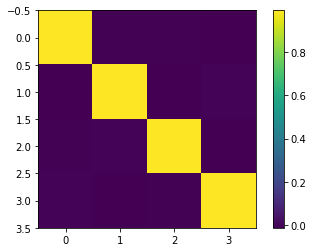

In [4]:
plt.imshow(M_av_ah.real)
plt.colorbar()

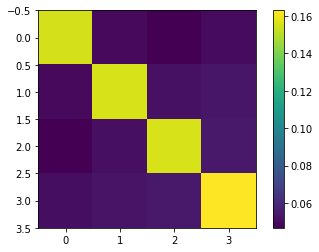

In [5]:
plt.imshow(M_av_ah.imag)
plt.colorbar()

In [6]:
# show that on M_av is very close to a constant phase multiplied by the identity matrix

np.round(1/M_av[0,0] * M_av, 3)

array([[ 1.   +0.j   , -0.001+0.001j, -0.   -0.001j,  0.001+0.j   ],
       [-0.   -0.j   ,  0.999+0.001j,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.001j, -0.   +0.j   ,  0.999+0.002j, -0.   +0.001j],
       [-0.   -0.j   , -0.   +0.001j,  0.   +0.j   ,  1.   +0.001j]])

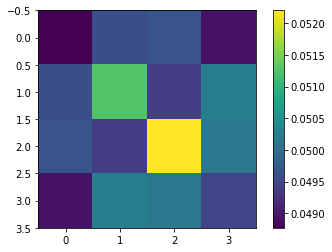

In [7]:
B_av = np.empty([4,4],dtype = np.complex128)
for _ in range(1000):
    M = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B = 0.5 * (M - M.conj().T)*0.1
    B_av += B
    
B_av /= 1000
plt.imshow(B_av.imag)
plt.colorbar()


Numerically the result seems to be that to 1st order the result is the Identity matrix. The O(dt) it is a phase change on the qubits and then to O(dt^2) there are other effects. Either way very promising for these results. 